<a href="https://colab.research.google.com/github/ahsanuamal/ahsanuamal/blob/main/SIngle_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import library yang dibutuhkan
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#data input = gerbang logika AND
inputLogikaAnd = np.matrix([[-1,-1],[-1,1],[1,-1],[1,1]])
bias = np.matrix([[1],[1],[1],[1]])
#menambahkan bias bernilai 1, ke input pada kolom ketiga
x = np.concatenate((inputLogikaAnd,bias), axis=1)

In [3]:
#inisasi bobot w dg nilai nol
w = np.full((3,1),0)

In [4]:
#label ground truth
gt = np.matrix([[-1], [-1], [-1], [1]])

In [5]:
#definisikan learning rate, misal 0.5
n = 0.5

In [6]:
#loop hingga konvergen
counter = 0; iterasi = 0
while(True):
    iterasi += 1
    print("---------------------------")
    print("itearsi-"+str(iterasi))
    y=w.T.dot(x[counter,:].T)
    #update W dengan formula 10.8
    w = np.add(w, n*np.asscalar((gt[counter]) - y)
               *x[counter,:].T)
    #cek apakah sudah konvergen, jika iya maka stop (break)
    y_sign = np.sign(w.T.dot(x.T))
    if ((y_sign.T == gt).all()):
        break
    counter = counter + 1
    # reset counter ke nol jika sudah sampai ke baris data terakhir
    if (counter == x.shape[0] - 1):
        counter = 0

print("\nIterasi selesai!")
print("paremeter W:\n", w)
print("ground truth label:\n", gt)
print("prediksi:\n", y_sign.T)

---------------------------
itearsi-1

Iterasi selesai!
paremeter W:
 [[ 0.5]
 [ 0.5]
 [-0.5]]
ground truth label:
 [[-1]
 [-1]
 [-1]
 [ 1]]
prediksi:
 [[-1.]
 [-1.]
 [-1.]
 [ 1.]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  # Remove the CWD from sys.path while we load stuff.


In [7]:
#kode di bawah ini untuk mengeplot decision boundary saja

#fungsi untuk membuat mesh points sebagai input
#saat mengeplot contour dari decision boundary
def buatMeshGrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [8]:
#fungsi untuk mengeplot contour dari decision boundary
def plot_contours(w, xx, yy, **params):
    bias_mesh = np.full((yy.ravel().shape[0]),1)
    input_mesh = np.vstack([xx.ravel(), yy.ravel(), bias_mesh])
    Z = np.sign(np.dot(w.T,input_mesh))
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

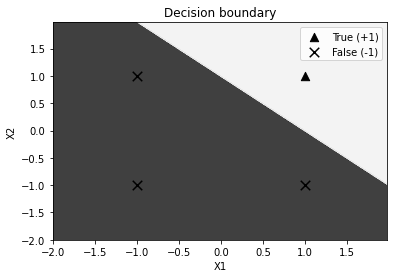

In [9]:
#plot decision boundary
X0, X1 = np.array(inputLogikaAnd[:,0]), np.array(inputLogikaAnd[:,1])
xx, yy = buatMeshGrid(X0, X1)
plt.figure()
plt.title("Decision boundary")
plot_contours(w, xx, yy,  cmap=plt.cm.gray, alpha=0.8)
plt.scatter(X0[gt==1], X1[gt==1], marker='^',
            s=70, c='black', label='True (+1)')
plt.scatter(X0[gt==-1], X1[gt==-1], marker='x',
            s=90, c='black', label='False (-1)')
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()